# Named Entity Recognition on Kenya Article

## First NER

This notebook contains Named Entity Recognizer. The first section uses nltk and the second section uses spacy.

### 1. NLTK Section 

#### Importing the necessary modules 

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

#### Extracting information from a sentence

Excerpt from the Standard Newspaper Article

In [15]:
ex = 'Facebook Inc Chief Executive Mark Zuckerberg navigated through the first of two US congressional hearings without making any promises to support new legislation or change how the social network does business'

Applying word tokenization and part-of-speech tagging to the sentence

In [16]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [17]:
sent = preprocess(ex)
sent

[('Facebook', 'NNP'),
 ('Inc', 'NNP'),
 ('Chief', 'NNP'),
 ('Executive', 'NNP'),
 ('Mark', 'NNP'),
 ('Zuckerberg', 'NNP'),
 ('navigated', 'VBD'),
 ('through', 'IN'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('of', 'IN'),
 ('two', 'CD'),
 ('US', 'NNP'),
 ('congressional', 'JJ'),
 ('hearings', 'NNS'),
 ('without', 'IN'),
 ('making', 'VBG'),
 ('any', 'DT'),
 ('promises', 'NNS'),
 ('to', 'TO'),
 ('support', 'VB'),
 ('new', 'JJ'),
 ('legislation', 'NN'),
 ('or', 'CC'),
 ('change', 'VB'),
 ('how', 'WRB'),
 ('the', 'DT'),
 ('social', 'JJ'),
 ('network', 'NN'),
 ('does', 'VBZ'),
 ('business', 'NN')]

In [18]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [19]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  Facebook/NNP
  Inc/NNP
  Chief/NNP
  Executive/NNP
  Mark/NNP
  Zuckerberg/NNP
  navigated/VBD
  through/IN
  the/DT
  first/JJ
  of/IN
  two/CD
  US/NNP
  congressional/JJ
  hearings/NNS
  without/IN
  making/VBG
  any/DT
  promises/NNS
  to/TO
  support/VB
  (NP new/JJ legislation/NN)
  or/CC
  change/VB
  how/WRB
  (NP the/DT social/JJ network/NN)
  does/VBZ
  (NP business/NN))


In [22]:
from nltk.chunk import ne_chunk, conlltags2tree, tree2conlltags
from pprint import pprint

iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('Facebook', 'NNP', 'O'),
 ('Inc', 'NNP', 'O'),
 ('Chief', 'NNP', 'O'),
 ('Executive', 'NNP', 'O'),
 ('Mark', 'NNP', 'O'),
 ('Zuckerberg', 'NNP', 'O'),
 ('navigated', 'VBD', 'O'),
 ('through', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('first', 'JJ', 'O'),
 ('of', 'IN', 'O'),
 ('two', 'CD', 'O'),
 ('US', 'NNP', 'O'),
 ('congressional', 'JJ', 'O'),
 ('hearings', 'NNS', 'O'),
 ('without', 'IN', 'O'),
 ('making', 'VBG', 'O'),
 ('any', 'DT', 'O'),
 ('promises', 'NNS', 'O'),
 ('to', 'TO', 'O'),
 ('support', 'VB', 'O'),
 ('new', 'JJ', 'B-NP'),
 ('legislation', 'NN', 'I-NP'),
 ('or', 'CC', 'O'),
 ('change', 'VB', 'O'),
 ('how', 'WRB', 'O'),
 ('the', 'DT', 'B-NP'),
 ('social', 'JJ', 'I-NP'),
 ('network', 'NN', 'I-NP'),
 ('does', 'VBZ', 'O'),
 ('business', 'NN', 'B-NP')]


Results from the chunker. Facebook is misclassified and a person

In [23]:
ne_tree = ne_chunk(pos_tag(word_tokenize(ex)))
print(ne_tree)

(S
  (PERSON Facebook/NNP)
  (ORGANIZATION Inc/NNP)
  Chief/NNP
  Executive/NNP
  (PERSON Mark/NNP Zuckerberg/NNP)
  navigated/VBD
  through/IN
  the/DT
  first/JJ
  of/IN
  two/CD
  (GSP US/NNP)
  congressional/JJ
  hearings/NNS
  without/IN
  making/VBG
  any/DT
  promises/NNS
  to/TO
  support/VB
  new/JJ
  legislation/NN
  or/CC
  change/VB
  how/WRB
  the/DT
  social/JJ
  network/NN
  does/VBZ
  business/NN)


### 1. SpaCy Section 

Importing necessary modules

In [26]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

Entity types of SpaCy are as follows:
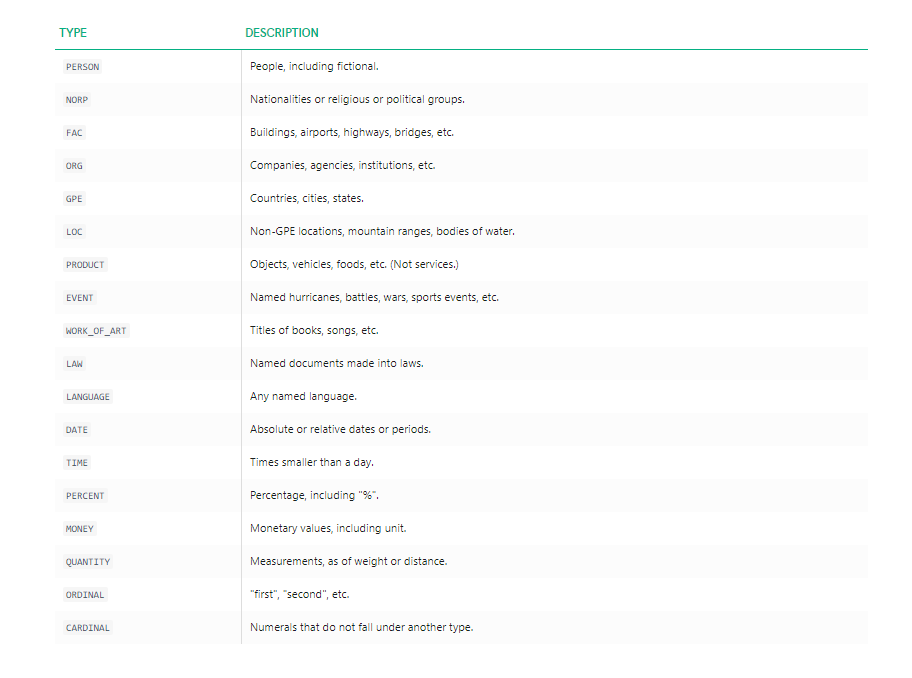

The previous sentence used has the entities correctly identified.

In [28]:
doc = nlp('Facebook Inc Chief Executive Mark Zuckerberg navigated through the first of two US congressional hearings without making any promises to support new legislation or change how the social network does business')
pprint([(X.text, X.label_) for X in doc.ents])

[('Facebook Inc', 'ORG'),
 ('Mark Zuckerberg', 'PERSON'),
 ('first', 'ORDINAL'),
 ('two', 'CARDINAL'),
 ('US', 'GPE')]


In [29]:
print([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(Facebook, 'B', 'ORG'), (Inc, 'I', 'ORG'), (Chief, 'O', ''), (Executive, 'O', ''), (Mark, 'B', 'PERSON'), (Zuckerberg, 'I', 'PERSON'), (navigated, 'O', ''), (through, 'O', ''), (the, 'O', ''), (first, 'B', 'ORDINAL'), (of, 'O', ''), (two, 'B', 'CARDINAL'), (US, 'B', 'GPE'), (congressional, 'O', ''), (hearings, 'O', ''), (without, 'O', ''), (making, 'O', ''), (any, 'O', ''), (promises, 'O', ''), (to, 'O', ''), (support, 'O', ''), (new, 'O', ''), (legislation, 'O', ''), (or, 'O', ''), (change, 'O', ''), (how, 'O', ''), (the, 'O', ''), (social, 'O', ''), (network, 'O', ''), (does, 'O', ''), (business, 'O', '')]


Printing out the information that was extracted.

In [30]:
from bs4 import BeautifulSoup
import requests
import re

In [31]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, "html.parser")
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))

ny_bb = url_to_string('https://www.standardmedia.co.ke/business/article/2001308058/2018-review-facebook-twitter-ceo-investigated-over-data-breach')
article = nlp(ny_bb)
len(article.ents)

174

In [32]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORG': 55,
         'GPE': 25,
         'LOC': 1,
         'DATE': 21,
         'PERSON': 28,
         'ORDINAL': 3,
         'CARDINAL': 15,
         'NORP': 11,
         'PRODUCT': 2,
         'TIME': 8,
         'EVENT': 2,
         'WORK_OF_ART': 2,
         'LANGUAGE': 1})

In [33]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Facebook', 11), ('Twitter', 7), ('US', 6)]

In [34]:
sentences = [x for x in article.sents]
print(sentences[20])

"When you're building something like Facebook which is unprecedented in the world, there are things that you're going to mess up...


In [35]:
displacy.render(nlp(str(sentences[20])), jupyter=True, style='ent')

In [36]:
displacy.render(nlp(str(sentences[20])), style='dep', jupyter = True, options = {'distance': 120})

In [37]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences[20])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('When', 'ADV', 'when'),
 ("'re", 'VERB', 'be'),
 ('building', 'VERB', 'build'),
 ('like', 'ADP', 'like'),
 ('Facebook', 'PROPN', 'facebook'),
 ('unprecedented', 'ADJ', 'unprecedented'),
 ('world', 'NOUN', 'world'),
 ('things', 'NOUN', 'thing'),
 ("'re", 'VERB', 'be'),
 ('going', 'VERB', 'go'),
 ('mess', 'VERB', 'mess')]

In [38]:
dict([(str(x), x.label_) for x in nlp(str(sentences[20])).ents])

{'Facebook': 'ORG'}

In [39]:
print([(x, x.ent_iob_, x.ent_type_) for x in sentences[20]])

[(", 'O', ''), (When, 'O', ''), (you, 'O', ''), ('re, 'O', ''), (building, 'O', ''), (something, 'O', ''), (like, 'O', ''), (Facebook, 'B', 'ORG'), (which, 'O', ''), (is, 'O', ''), (unprecedented, 'O', ''), (in, 'O', ''), (the, 'O', ''), (world, 'O', ''), (,, 'O', ''), (there, 'O', ''), (are, 'O', ''), (things, 'O', ''), (that, 'O', ''), (you, 'O', ''), ('re, 'O', ''), (going, 'O', ''), (to, 'O', ''), (mess, 'O', ''), (up, 'O', ''), (..., 'O', '')]


Recognizer implemented on the whole article

In [40]:
displacy.render(article, jupyter=True, style='ent')